In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
data = pd.read_csv('../data/data_scrapping_cleaned.csv', index_col=0)
data.head()

,alias,date,rate,review,review_clean
0,le-sud-paris,2018-11-20,5,"Ed W.\nElite 2021\nMiami, FL\n259\n562\n4232\n...",traditional parisian cooking style restaurant ...
1,le-sud-paris,2021-07-04,2,"Jaki F.\nElite 2021\nSignal Hill, CA\n358\n270...",im sure happening restaurant excited dine serv...
2,le-sud-paris,2018-06-20,3,"Jen S.\nElite 2021\nBuffalo, NY\n71\n322\n809\...",ambience enticing end day definitely directed ...
3,le-sud-paris,2015-09-28,3,"Sam S.\nElite 2021\nMunich, Germany\n2133\n255...",ambience star opinion expensive tourist trap m...
4,le-sud-paris,2019-08-08,1,"Fahad A.\nLos Angeles, CA\n0\n10\n15\n8/8/2019...",worst restaurant ever servers help us food bla...


# Pre-process

In [11]:
df_2K = data.sample(2000)
df_2K

,alias,date,rate,review,review_clean
8945,monsieur-bleu-paris,2017-10-07,5,"Mickey C.\nElite 2021\nSeattle, WA\n14\n161\n9...",place bomb note though youre american make sur...
42262,joséphine-chez-dumonet-paris-5,2012-10-09,5,"Rebecca v.\nBreckenridge, CO\n239\n184\n18\n10...",divine meal small restaurant must reservations...
6355,il-posto-paris,2017-10-09,4,"R G.\nTustin, CA\n0\n26\n3\n10/9/2017\nDelicio...",delicious dined recent trip london nice owner ...
16953,aki-paris-2,2018-06-02,4,"Trisha Q.\nMiddletown, NJ\n268\n8\n11\n6/2/201...",dont think could find anything like united sta...
28391,strada-café-paris,2018-06-22,5,"Jason C.\nNew York, NY\n3\n7\n6/22/2018\nEvery...",everything delicious french toast salad sandwi...
...,...,...,...,...,...
39883,l-arpège-paris-2,2017-06-11,3,"C T.\nLos Angeles, CA\n3\n199\n23\n6/11/2017\n...",dh looking forward meal larpege really wanted ...
5718,saravanaa-bhavan-paris-2,2018-10-06,3,"Darlene Y.\nElite 2021\nLos Angeles, CA\n532\n...",right ask servers food spicy say dont believe ...
13537,angelina-paris,2018-11-24,5,"Bobby S.\nFremont, CA\n4\n169\n315\n11/24/2018...",tourist must visit place told hot chocolate di...
19975,flottes-paris,2020-08-30,4,"Alison J.\nElite 2021\nLe Grand-Pressigny, Fra...",dinner paris always treat staying nearby found...


In [12]:
df_2K = df_2K.reset_index(drop=True)

# TOP2VEC

## Initialisze & train model

### Create model

In [13]:
from top2vec import Top2Vec

In [14]:

fast_model = Top2Vec(list(data.review_clean[:10000]), speed= 'fast-learn', workers = 8)
learn_model = Top2Vec(list(data.review_clean[:10000]), speed= 'learn', workers=8)

2021-11-25 08:57:20,982 - top2vec - INFO - Pre-processing documents for training
2021-11-25 08:57:22,511 - top2vec - INFO - Creating joint document/word embedding
2021-11-25 08:58:02,856 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2021-11-25 08:58:34,247 - top2vec - INFO - Finding dense areas of documents
/Users/hugochanteloup/.pyenv/versions/3.8.12/envs/FOBO/lib/python3.8/site-packages/hdbscan/hdbscan_.py:275: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  alg = KDTreeBoruvkaAlgorithm(tree, min_samples, metric=metric,
/Users/hugochanteloup/.pyenv/ve

In [15]:
fast_model.get_num_topics(), learn_model.get_num_topics()

(2, 59)

### Analyse corpus

In [31]:
#fast_topic_words, fast_word_scores, fast_topic_nums = fast_model.get_topics(2)
lf_topic_words, lf_word_scores, lf_topic_nums = learn_model.get_topics(59)

In [32]:
# return nbr of reviews most similar to each topic
pd.DataFrame(learn_model._calculate_topic_sizes(), columns=["nbr_reviews"])

,nbr_reviews
0,987
1,575
2,439
3,381
4,360
5,360
6,344
7,332
8,296
9,278


In [33]:
# words in topics
pd.DataFrame(lf_topic_words.T)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,rude,breast,steak,feel,even,beaten,like,perfectly,people,vietnamese,...,arc,truffles,couscous,frog,quiche,oysters,vegan,joel,hide,raclette
1,horrible,foie,fries,paris,least,lasagna,taste,flavorful,drinks,pho,...,triomphe,future,added,legs,cappuccino,seafood,vegetarian,robuchon,poached,cheese
2,manager,duck,frites,possibly,one,hip,tasted,tender,patrons,rolls,...,walk,signature,sausage,leg,breakfast,prawns,cheeses,tasting,ravioli,meats
3,worst,tender,relais,intimate,feel,distance,good,rich,sitting,spring,...,distance,divine,eur,snails,juice,shell,family,michelin,courses,melted
4,bill,gras,lentrecote,time,never,path,cut,sauce,des,noodles,...,near,wow,veggies,escargot,everywhere,bites,options,creative,dessert,pot
5,asked,rich,medium,experience,experience,gluten,think,nicely,young,hong,...,tucked,macaroni,vegetarian,cosy,coffee,platter,son,amuse,rich,fondue
6,ignored,smooth,servings,wont,better,prompt,nothing,creamy,corner,lac,...,blocks,top,broth,breast,pastries,professional,offers,chefs,pear,sandwiches
7,leave,perfectly,line,one,leave,artists,much,crisp,another,bo,...,street,elegant,enough,honey,ham,meal,veggie,experienced,main,future
8,check,potatoes,profiteroles,made,take,specials,dry,taste,tables,roll,...,gem,mood,standard,app,hot,raw,decide,exquisite,desserts,cook
9,never,paired,rare,food,end,tucked,sauce,dish,sit,asian,...,stop,forget,homemade,escargots,day,classic,buy,impeccable,outstanding,ham


In [34]:
#get a vector for a review
learn_model._get_document_vectors()[1].reshape(300,1)

array([[ 6.38068244e-02],
       [ 2.18262197e-03],
       [ 7.22479215e-03],
       [ 1.76634297e-01],
       [-2.82074828e-02],
       [ 7.58550409e-03],
       [ 1.08042024e-01],
       [-3.45365591e-02],
       [-1.66014344e-01],
       [-3.77594717e-02],
       [-1.64184999e-02],
       [-1.28816918e-01],
       [-2.21030824e-02],
       [ 1.32278912e-02],
       [-1.05006397e-01],
       [-1.27331078e-01],
       [-8.53663981e-02],
       [-1.24399945e-01],
       [-5.07856868e-02],
       [ 7.92656317e-02],
       [-1.75012369e-02],
       [-3.78355780e-03],
       [ 9.64884006e-04],
       [ 1.30349100e-01],
       [-5.89356013e-02],
       [ 5.84322438e-02],
       [ 2.62353271e-02],
       [ 1.54338405e-02],
       [ 3.97428833e-02],
       [ 9.96267144e-03],
       [-1.11151822e-01],
       [-1.02461800e-02],
       [-3.93438124e-04],
       [-6.93434551e-02],
       [ 8.47879276e-02],
       [-6.55978778e-03],
       [-1.06581179e-02],
       [ 3.19047831e-02],
       [ 7.9

In [35]:
#get a vector for a words
learn_model
learn_model._get_word_vectors()[10].reshape(300,1)

array([[ 2.97936238e-02],
       [ 2.39922255e-02],
       [ 9.71876085e-02],
       [-5.30081503e-02],
       [ 4.47627865e-02],
       [ 6.30347952e-02],
       [-4.52845544e-02],
       [ 3.88087183e-02],
       [-3.55751254e-02],
       [ 5.81194125e-02],
       [ 2.14487556e-02],
       [-1.03546903e-01],
       [ 6.36871234e-02],
       [ 1.11475229e-01],
       [ 4.12300229e-02],
       [ 4.90922518e-02],
       [-8.45835451e-03],
       [ 9.44656041e-03],
       [-5.78312613e-02],
       [-7.50906989e-02],
       [-1.06909856e-01],
       [-9.49069113e-02],
       [ 6.94499537e-02],
       [ 2.17411295e-02],
       [ 5.08246757e-03],
       [-4.60319556e-02],
       [ 3.02634947e-02],
       [-6.84907753e-03],
       [ 8.57799053e-02],
       [-4.58553843e-02],
       [-9.11852624e-03],
       [-7.25388303e-02],
       [ 5.35115004e-02],
       [-7.41928592e-02],
       [-3.30143981e-02],
       [-2.37423647e-02],
       [ 9.94585976e-02],
       [ 1.88307408e-02],
       [-2.6

In [36]:
learn_model._calculate_documents_topic(learn_model._get_word_vectors()[10].reshape(300,1), learn_model._get_document_vectors()[1].reshape(300,1), dist=True, num_topics=None)



#return doc in the topic and distance of topics


(array([272, 272, 272, 272,  46, 272, 272,  46,  46,  46,  46,  46,  46,
        272,  46,  46,  46,  46,  46, 272,  46,  46, 272, 272,  46, 272,
        272, 272, 272, 272,  46,  46,  46,  46, 272,  46,  46, 272, 272,
        272, 272,  46,  46,  46,  46,  46,  46, 272,  46,  46, 272, 272,
         46, 272, 272,  46, 272, 272, 272,  46, 272, 272, 272, 272,  46,
         46,  46, 272,  46,  46, 272,  46, 272, 272,  46,  46, 272,  46,
         46,  46,  46, 272,  46, 272,  46,  46,  46, 272, 272,  46, 272,
         46,  46,  46, 272,  46, 272, 272,  46, 272, 272,  46,  46, 272,
        272, 272,  46,  46,  46,  46, 272, 272,  46,  46,  46, 272,  46,
         46,  46,  46,  46,  46,  46, 272,  46, 272, 272,  46,  46, 272,
        272, 272,  46, 272, 272,  46, 272, 272, 272,  46, 272, 272, 272,
        272, 272,  46, 272,  46,  46,  46, 272, 272, 272, 272, 272, 272,
         46,  46, 272, 272,  46,  46, 272,  46,  46,  46, 272, 272,  46,
         46, 272, 272, 272,  46,  46,  46,  46,  46

In [38]:
learn_model._find_topic_words_and_scores(learn_model._get_word_vectors()[1000].reshape(300,1).T)


(array([['whatever', 'ill', 'trying', 'smile', 'cant', 'eat', 'waitstaff',
         'going', 'isnt', 'thats', 'else', 'bad', 'fondue', 'probably',
         'come', 'im', 'huge', 'knowing', 'due', 'even', 'getting',
         'thought', 'youre', 'help', 'forget', 'patrons', 'dont',
         'tourist', 'wrong', 'pesto', 'think', 'mediocre', 'lived', 'fun',
         'guy', 'ate', 'theyre', 'either', 'normal', 'bottles', 'baby',
         'youd', 'thinking', 'leave', 'tried', 'wont', 'asking',
         'remember', 'somewhere', 'paid']], dtype='<U9'),
 array([[1.0000001 , 0.45124558, 0.4440739 , 0.4381876 , 0.4294602 ,
         0.42932993, 0.42088825, 0.42016706, 0.41423085, 0.41190892,
         0.4089421 , 0.40638888, 0.40408146, 0.39902967, 0.39849803,
         0.39823306, 0.39589703, 0.39383507, 0.39232937, 0.38685194,
         0.3852681 , 0.3844302 , 0.38319382, 0.38304687, 0.3813849 ,
         0.37785035, 0.37595212, 0.37531784, 0.37503573, 0.3749143 ,
         0.3747241 , 0.37429744, 0.

In [40]:
lf_topic_words[0], lf_word_scores[0], lf_topic_nums[0]

(array(['rude', 'horrible', 'manager', 'worst', 'bill', 'asked', 'ignored',
        'leave', 'check', 'never', 'left', 'attitude', 'said', 'worse',
        'bad', 'water', 'least', 'terrible', 'waste', 'obviously',
        'asking', 'told', 'even', 'paid', 'giving', 'order', 'charged',
        'someone', 'finally', 'clearly', 'avoid', 'customers', 'another',
        'let', 'money', 'mistake', 'waiting', 'ask', 'waiter', 'instead',
        'received', 'paying', 'minutes', 'pay', 'saying', 'fact',
        'attention', 'us', 'give', 'charge'], dtype='<U15'),
 array([0.7028699 , 0.67639166, 0.67453307, 0.6677507 , 0.66574746,
        0.6649388 , 0.6612085 , 0.6591691 , 0.65673065, 0.6542018 ,
        0.6521323 , 0.64855963, 0.63849413, 0.6357896 , 0.63060576,
        0.6280871 , 0.6263427 , 0.6263063 , 0.62372774, 0.62354225,
        0.62268287, 0.6215715 , 0.6209871 , 0.6178584 , 0.6112938 ,
        0.6097237 , 0.60535264, 0.6052517 , 0.6002621 , 0.5993209 ,
        0.5918297 , 0.59056264

In [41]:
doc_0_vect = learn_model._get_document_vectors()[0].reshape(300,1).T


In [42]:
learn_model._calculate_documents_topic(topic_vectors, doc_0_vect, dist = False)

NameError: name 'topic_vectors' is not defined

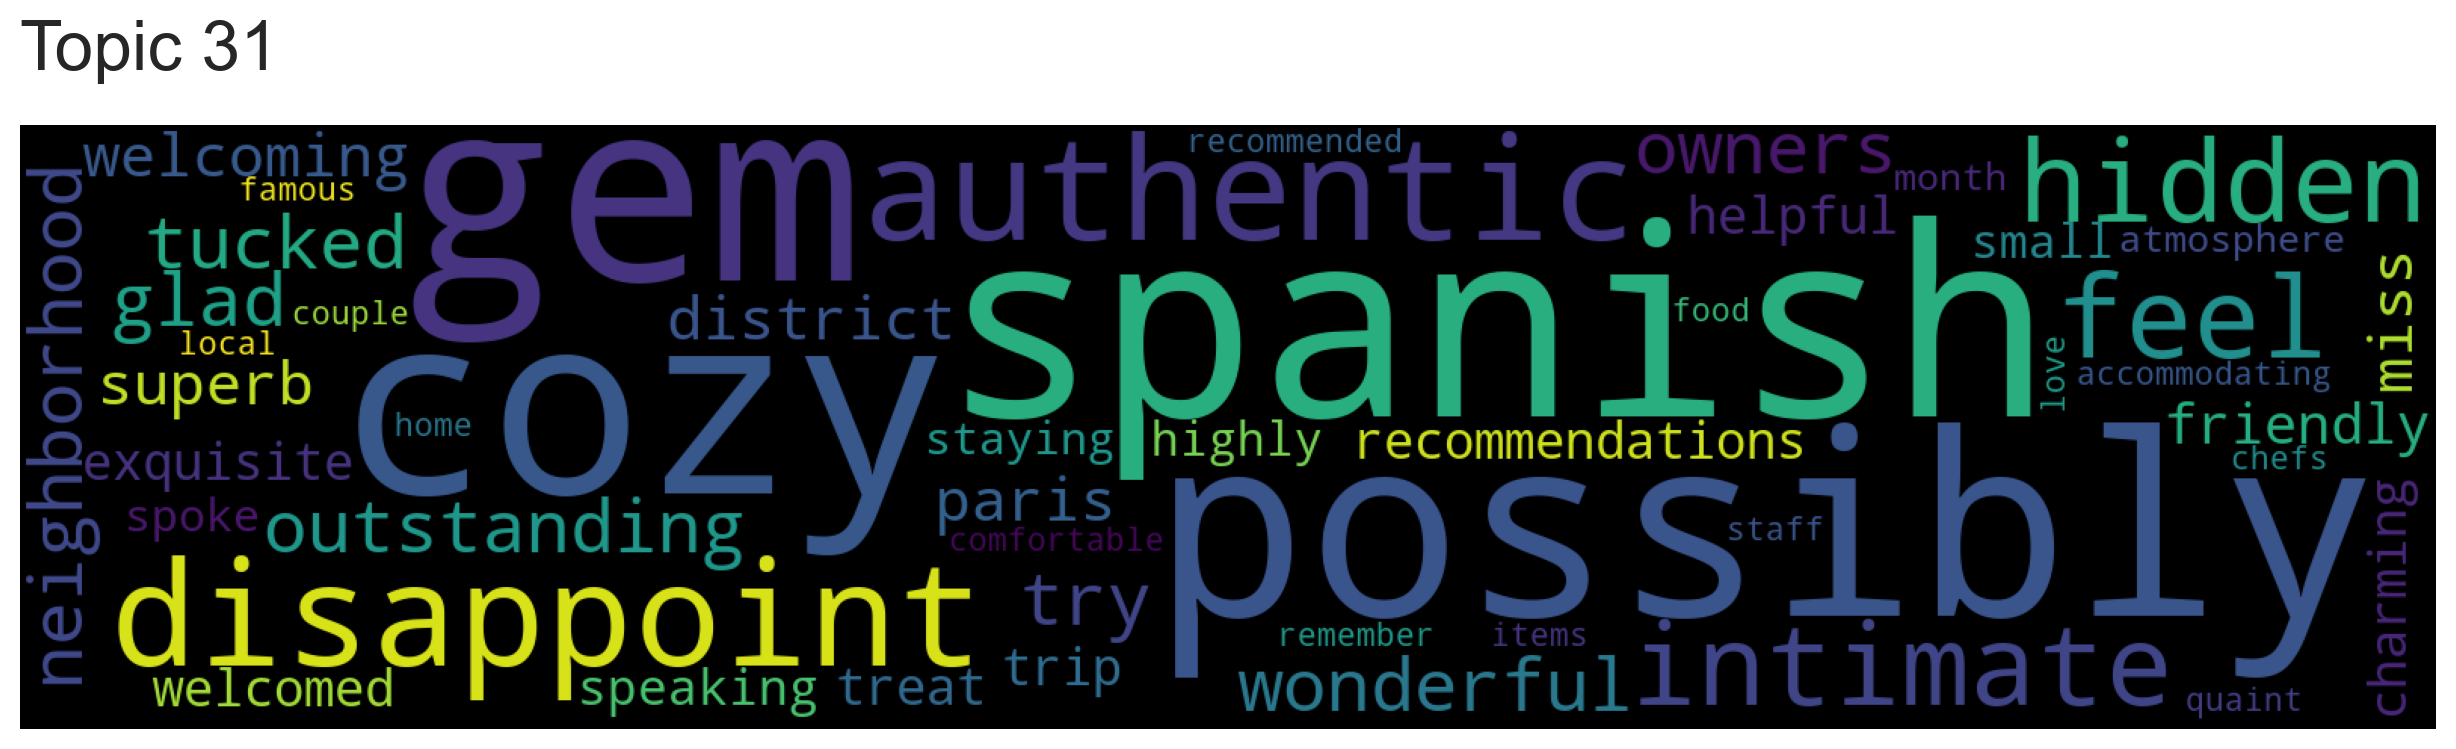

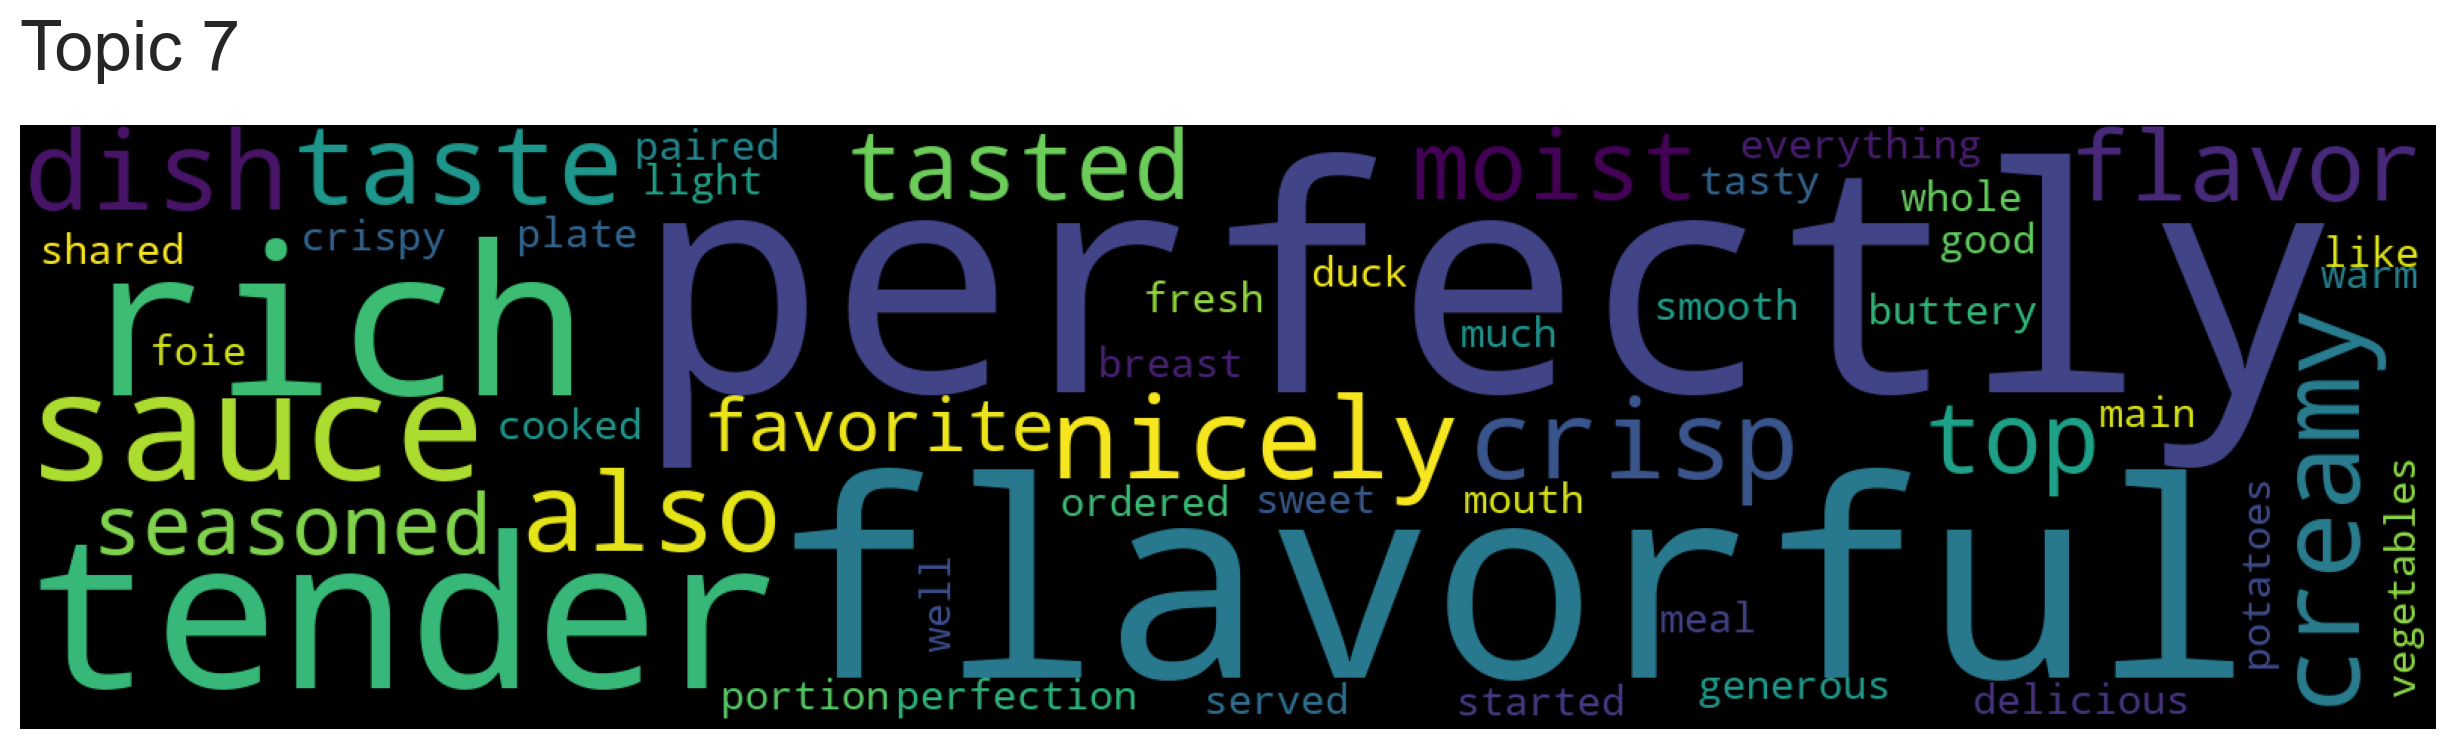

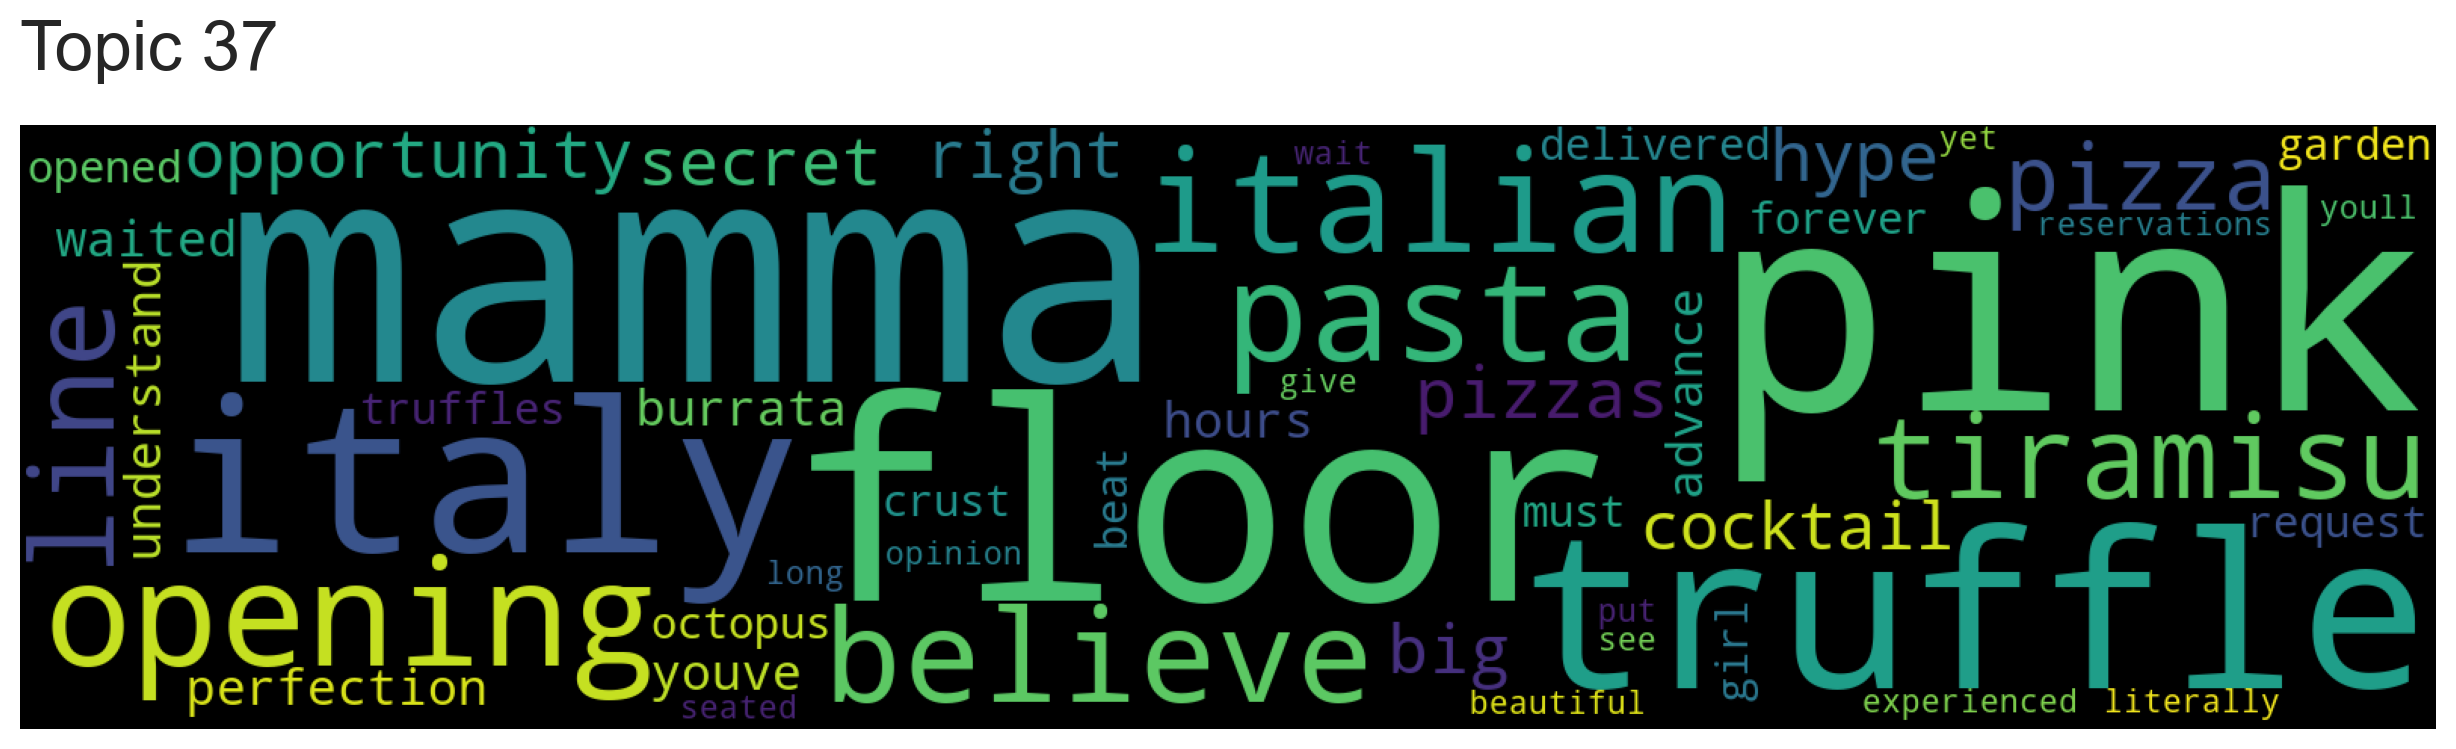

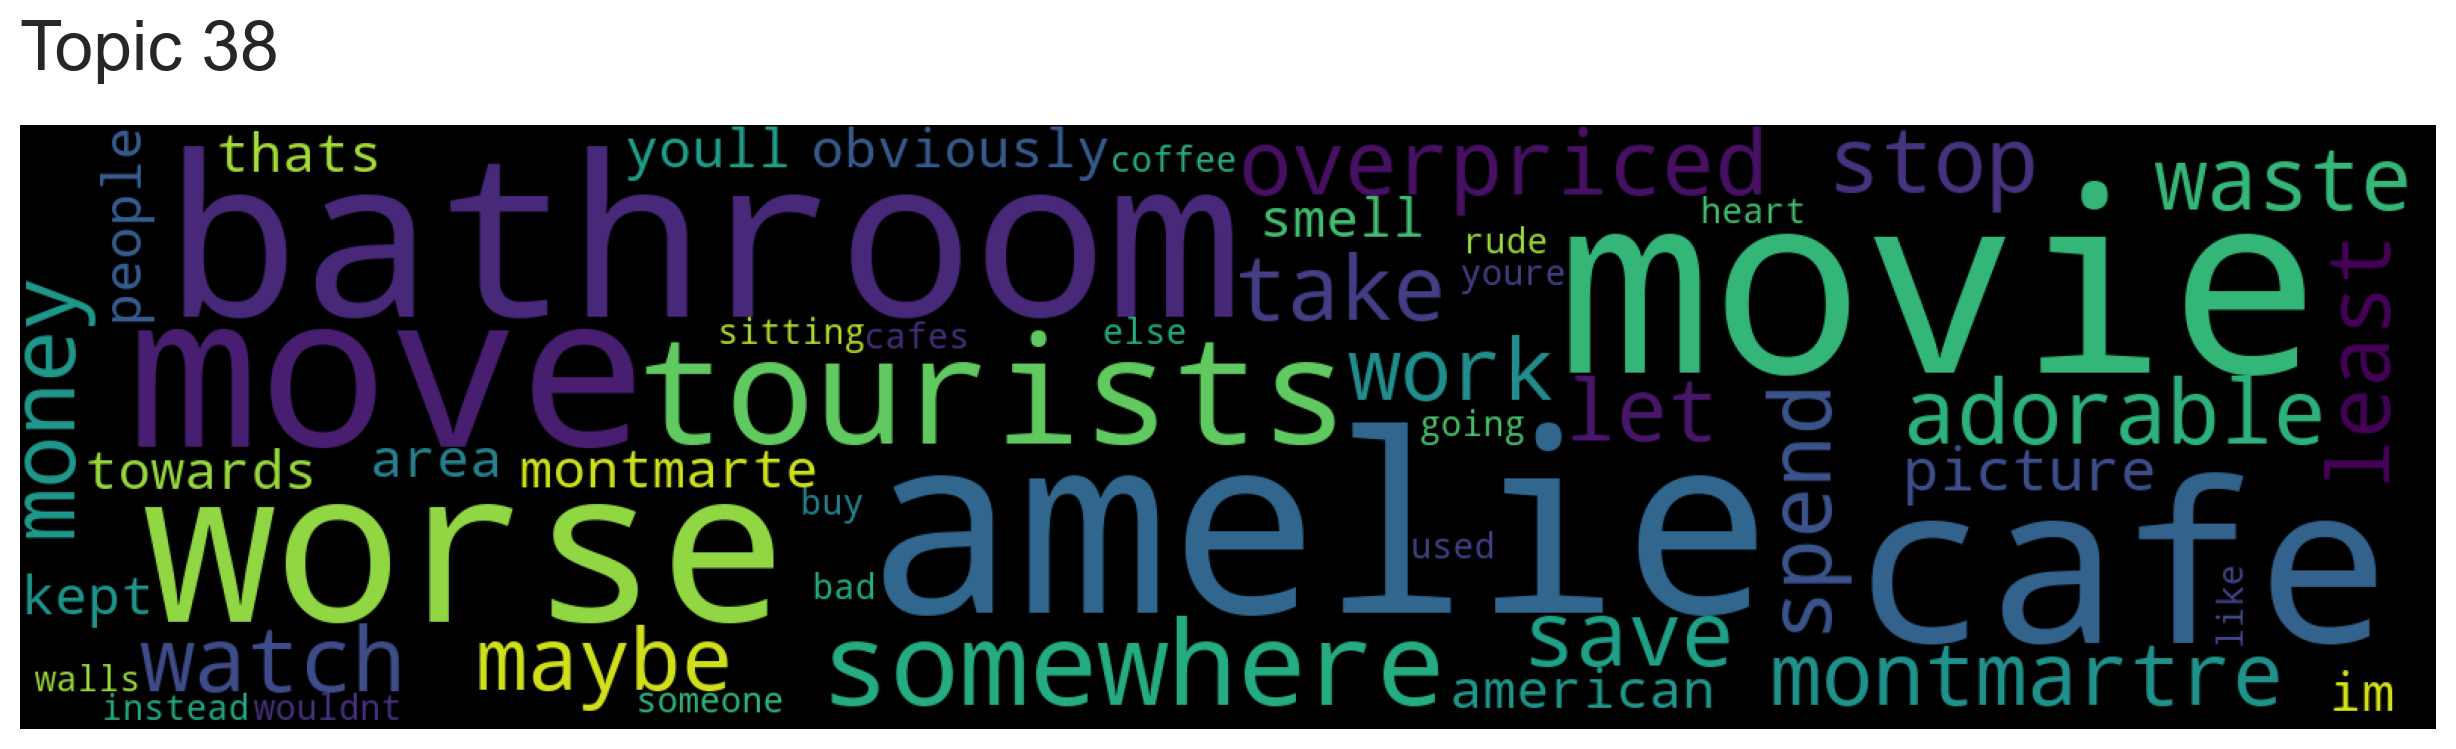

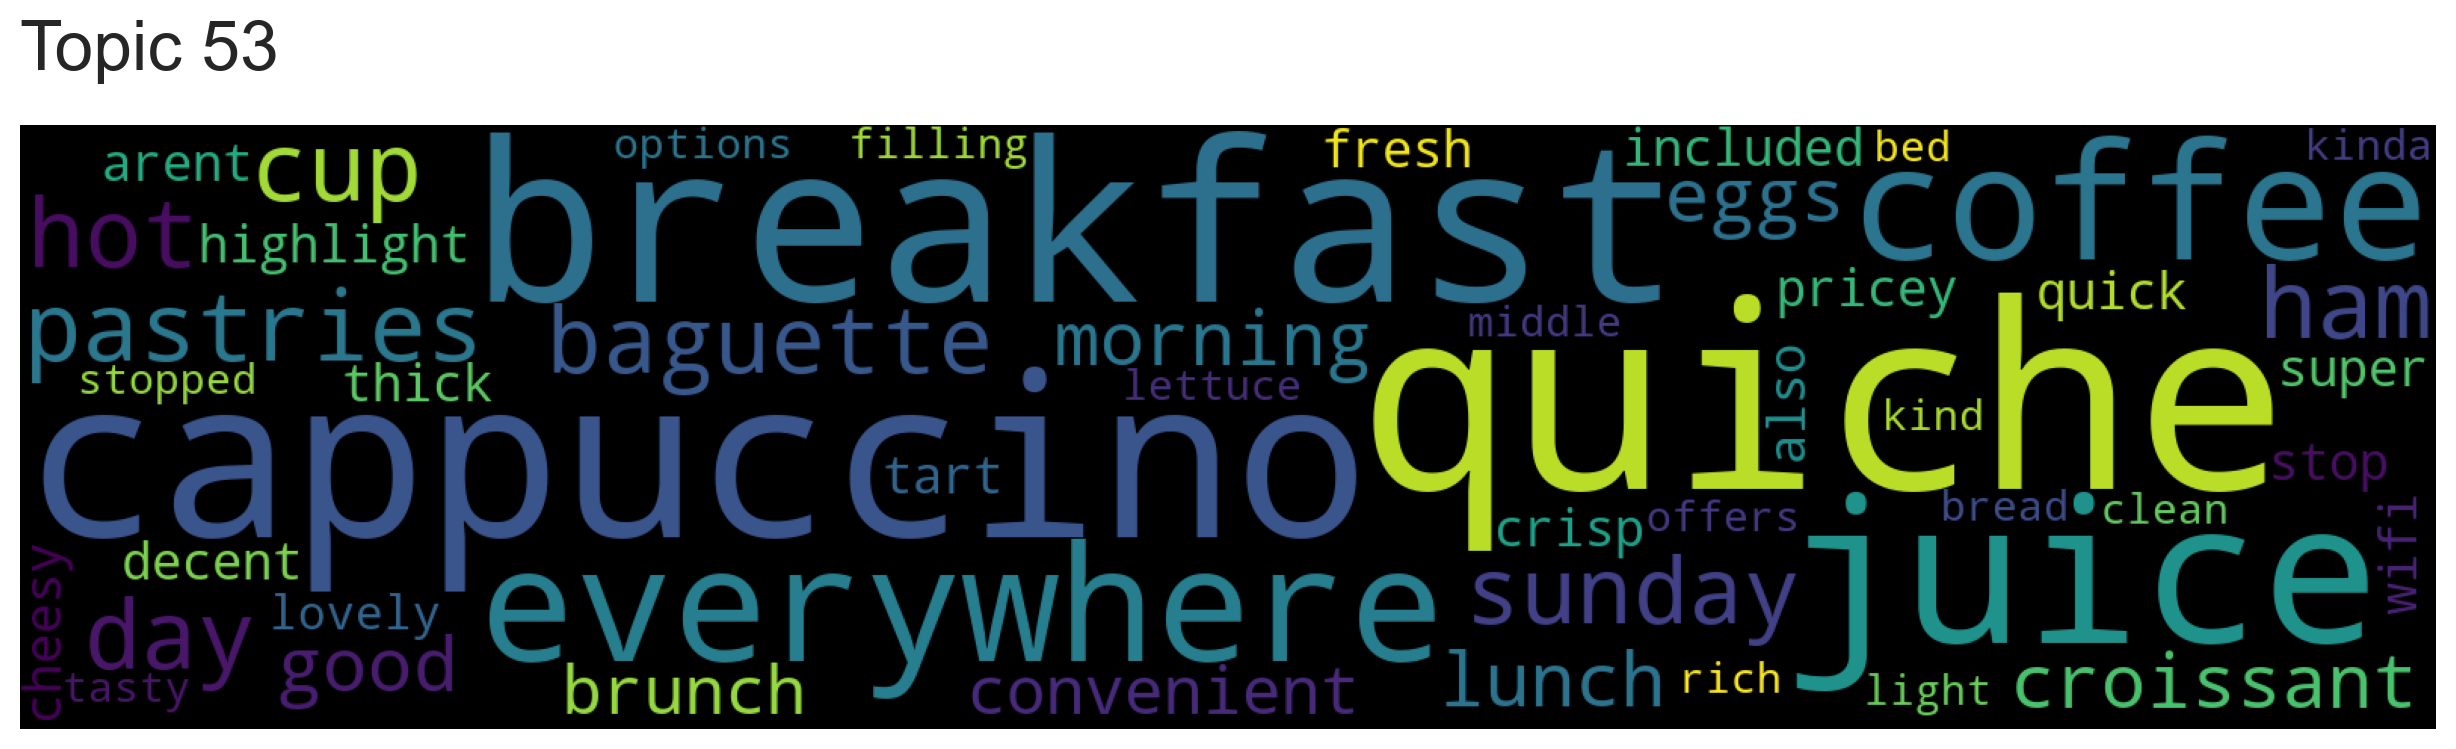

In [51]:
topic_words, word_scores, topic_scores, topic_nums = learn_model.search_topics(keywords=["cosy"], num_topics=5)
for topic in topic_nums:
    learn_model.generate_topic_wordcloud(topic,background_color='black')

In [59]:
#search best doc from given topic
documents, document_scores, document_ids = learn_model.search_documents_by_topic(topic_num=31, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 5189, Score: 0.9308915734291077
-----------
great food outstanding service really nice atmosphere lovely evening montremart district
-----------

Document: 4992, Score: 0.8708891272544861
-----------
great spot awesome meal waitress great know english adb spanish great ambience
-----------

Document: 7207, Score: 0.8365538716316223
-----------
small mice little place th district food absolutely delicious pricing reasonable would highly recommend
-----------

Document: 1306, Score: 0.8025944828987122
-----------
restaurant lovely service great menu fenech english italian possibly spanish hostessservermanager friendly food tasted fresh nice experience place small reservations recommended
-----------

Document: 7012, Score: 0.7754007577896118
-----------
absolutely wonderful experience every way small cozy location incredible food suggestions amazing staff learned lotte fish monk fish tried coconut sake wonderful time dont miss spot
-----------



In [54]:
#search best doc from given key words
documents, document_scores, document_ids = learn_model.search_documents_by_keywords(keywords=["cosy", "music"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 6163, Score: 0.6479676961898804
-----------
really good time kaskad café drinks reasonnable prices service super cool cute smiling polite waiters havent got chance eat yet certainly food smells delicious homemade french fries check program book go salsa nights whith live music green wall restaurant
-----------

Document: 5946, Score: 0.6307016611099243
-----------
bar du coin main roomrestaurant quite beautiful skylight dome fullon restaurant could see also club nights weekends later review bar du coin corner bistro side building surprised find relaxed pretty cosy atmosphere friday night past happy hour crowded loud perfect glass wine food options scarce typical assiettes charcuterie fromage lot choice vegetarians nonpork eating folks upside bottle white wine served ice bucket euros regular price another good spot prepost movie nearby mk close canal st martin menus walls
-----------

Document: 3914, Score: 0.6298128962516785
-----------
great specials delicious food good wine

In [ ]:
data['alias'][document_ids]

In [98]:
words, word_scores = learn_model.similar_words(keywords=["cosy"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

environment 0.49503098100227416
feels 0.48420416522725324
seems 0.4814470894278281
variety 0.4499931362083038
decor 0.4334905200958497
ahead 0.4334221781824855
walls 0.42930742855858395
frog 0.4280075868226909
intimate 0.42593203009709435
casual 0.42345915739954065
space 0.41846779627800446
prices 0.41027662630573913
lively 0.4096058629335839
limited 0.4095710203739245
helpful 0.40723278411910313
accommodating 0.3966664098229315
cozy 0.38911892057448866
reasonable 0.387383131718152
suggest 0.38562084570986055
nearby 0.3848197456321771


In [62]:
doc_topics = learn_model.get_documents_topics([11])
topic_names = doc_topics[2]
topic_probs = doc_topics[3]
df_topics = pd.DataFrame(topic_names).transpose().rename(columns={0 : "Topics"})
df_probs = pd.DataFrame(topic_probs).transpose().rename(columns={0 : "Probability"})
df = pd.concat([df_topics, df_probs], axis=1)

In [119]:
lf_topic_words[0]

array(['rude', 'horrible', 'manager', 'worst', 'bill', 'asked', 'ignored',
       'leave', 'check', 'never', 'left', 'attitude', 'said', 'worse',
       'bad', 'water', 'least', 'terrible', 'waste', 'obviously',
       'asking', 'told', 'even', 'paid', 'giving', 'order', 'charged',
       'someone', 'finally', 'clearly', 'avoid', 'customers', 'another',
       'let', 'money', 'mistake', 'waiting', 'ask', 'waiter', 'instead',
       'received', 'paying', 'minutes', 'pay', 'saying', 'fact',
       'attention', 'us', 'give', 'charge'], dtype='<U15')

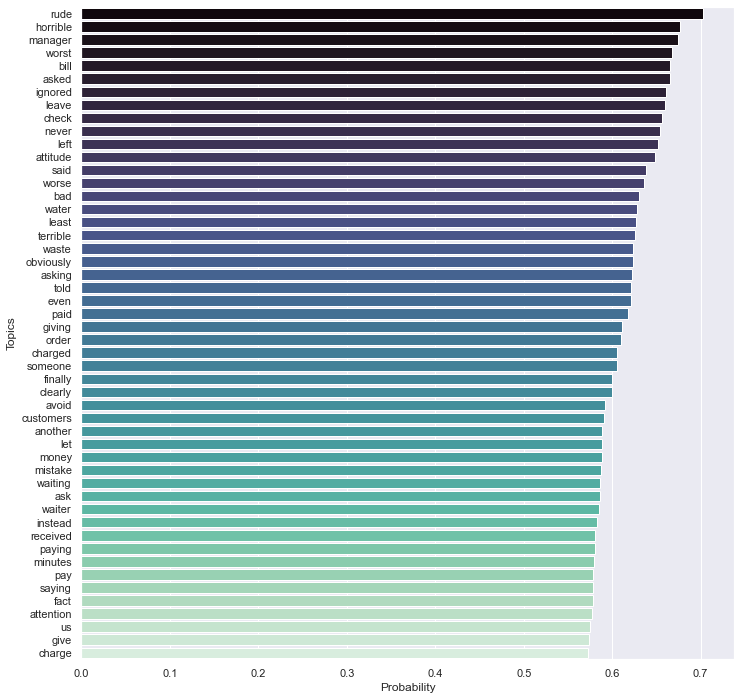

In [63]:
sns.set(rc={'figure.figsize':(11.7,12)})
ax = sns.barplot(x="Probability", y="Topics", data=df, palette="mako")

## UMAP & HDBSCAN

In [66]:
learn_model._get_word_vectors()

array([[ 0.00405723,  0.00092735,  0.10720455, ..., -0.04196565,
         0.0254395 ,  0.02468392],
       [ 0.08498719,  0.00469839,  0.05320906, ..., -0.03414748,
        -0.02963622,  0.03564834],
       [ 0.11062089,  0.03962842,  0.08626927, ..., -0.04467287,
         0.02556087,  0.0266976 ],
       ...,
       [-0.0311147 , -0.05517649,  0.12815501, ..., -0.04682144,
         0.05274952,  0.03624874],
       [-0.0024498 , -0.00296984,  0.03851501, ..., -0.05336137,
         0.06846606,  0.00143388],
       [ 0.06263251,  0.09493113, -0.09423444, ...,  0.00256444,
         0.10853087,  0.04397779]], dtype=float32)

In [67]:


embeddings = learn_model._get_word_vectors()

In [98]:
#embedging model top2vec
embeddings = learn_model._get_word_vectors()


#choose dimension


umap_embeddings = umap.UMAP(n_neighbors=30, #local neigbors #big -> global views, small -> local data being preserved
                            n_components=8, #dimensionality of the space embedings
                            metric='cosine').fit_transform(embeddings)

#nbr of cluster
cluster = hdbscan.HDBSCAN(min_cluster_size=8, #reviews embeddings 
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)



/Users/hugochanteloup/.pyenv/versions/3.8.12/envs/FOBO/lib/python3.8/site-packages/hdbscan/hdbscan_.py:275: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  alg = KDTreeBoruvkaAlgorithm(tree, min_samples, metric=metric,
/Users/hugochanteloup/.pyenv/versions/3.8.12/envs/FOBO/lib/python3.8/site-packages/hdbscan/hdbscan_.py:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addit

/var/folders/g2/fbwf804j5jq9lyct2w68nmvc0000gn/T/ipykernel_1731/1041338920.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


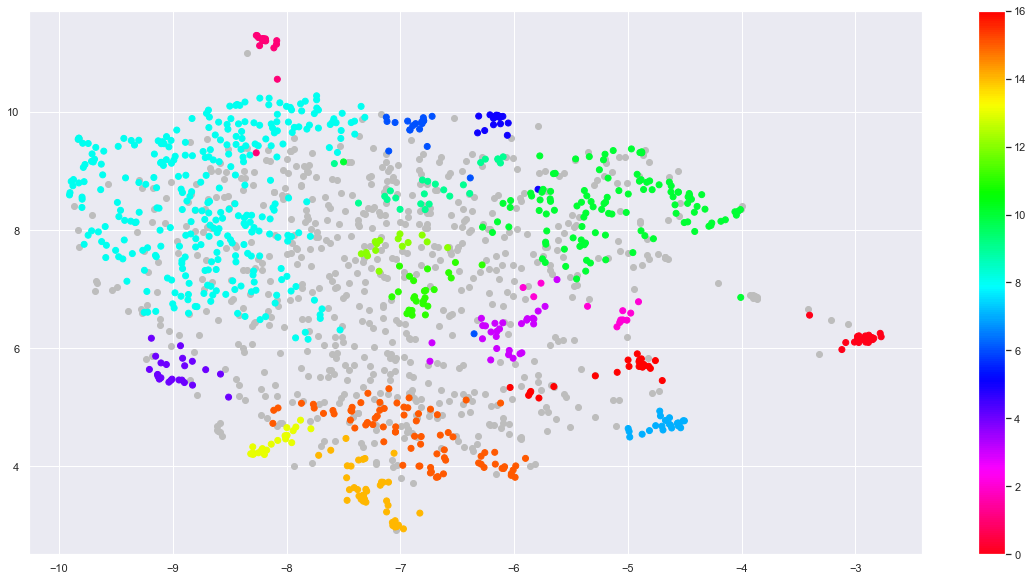

In [100]:
# data
#Finds a low dimensional embedding of the data that approximates an underlying manifold
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='cosine').fit_transform(embeddings)

result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD')
plt.scatter(clustered.x, clustered.y, c=clustered.labels,  cmap='hsv_r')
plt.colorbar();

In [109]:
len(pd.Series(cluster.labels_).unique())

18

/Users/hugochanteloup/.pyenv/versions/3.8.12/envs/FOBO/lib/python3.8/site-packages/hdbscan/plots.py:438: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(sm, ax=axis)


<AxesSubplot:ylabel='$\\lambda$ value'>

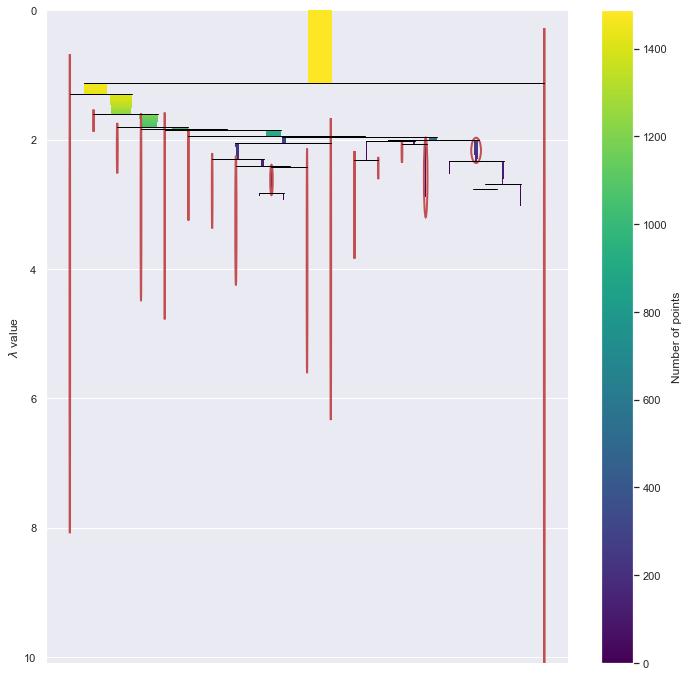

In [115]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())



/Users/hugochanteloup/.pyenv/versions/3.8.12/envs/FOBO/lib/python3.8/site-packages/hdbscan/hdbscan_.py:275: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  alg = KDTreeBoruvkaAlgorithm(tree, min_samples, metric=metric,
/Users/hugochanteloup/.pyenv/versions/3.8.12/envs/FOBO/lib/python3.8/site-packages/hdbscan/hdbscan_.py:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addit

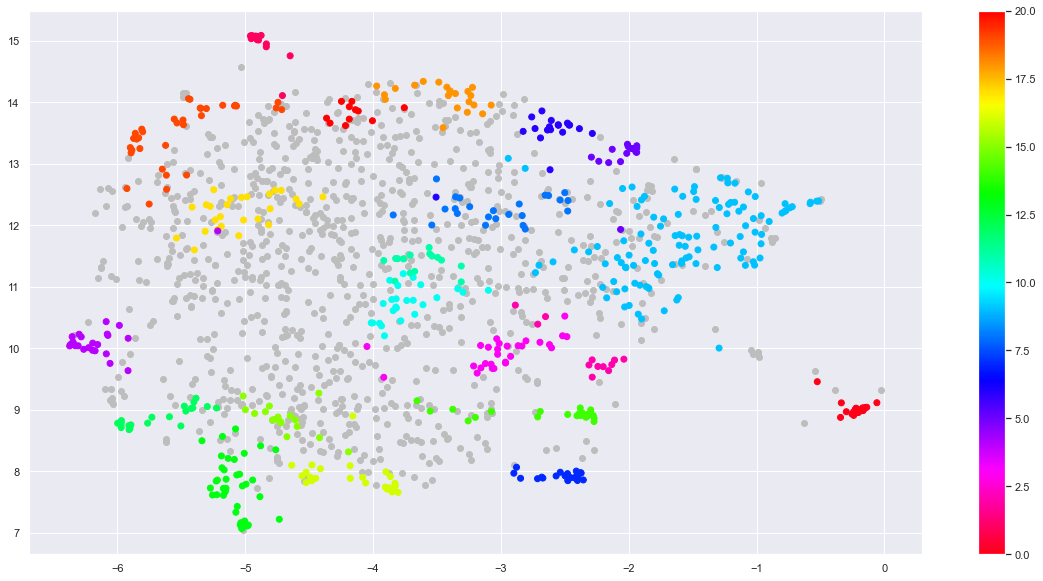

In [116]:
cluster = hdbscan.HDBSCAN(min_cluster_size=8, #reviews embeddings 
                          metric='euclidean',                      
                          cluster_selection_method='leaf').fit(umap_embeddings)

# data
#Finds a low dimensional embedding of the data that approximates an underlying manifold
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='cosine').fit_transform(embeddings)

result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD')
plt.scatter(clustered.x, clustered.y, c=clustered.labels,  cmap='hsv_r')
plt.colorbar();

In [117]:
len(pd.Series(cluster.labels_).unique())

22

/Users/hugochanteloup/.pyenv/versions/3.8.12/envs/FOBO/lib/python3.8/site-packages/hdbscan/plots.py:438: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(sm, ax=axis)


<AxesSubplot:ylabel='$\\lambda$ value'>

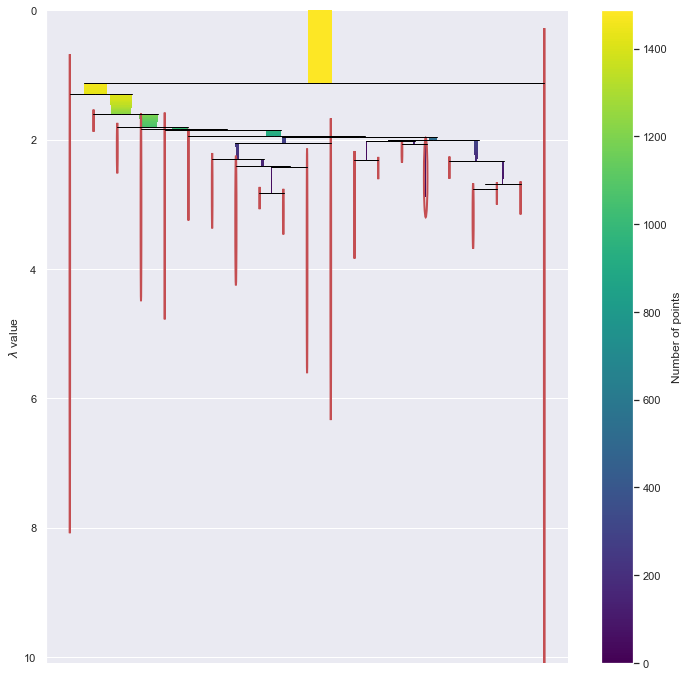

In [118]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

